# ADHD Clinical Trials: EDA and Predictive Modeling

This notebook provides an interactive exploration of ADHD clinical trial data and demonstrates the full machine learning pipeline for predicting trial success.

## Objectives

1. Fetch ADHD trial data from ClinicalTrials.gov
2. Perform exploratory data analysis (EDA)
3. Engineer features and create labels
4. Train and evaluate multiple ML models
5. Interpret results and identify key predictors

## Setup and Imports

In [18]:
import sys
import os

# Add parent directory to path
sys.path.append(os.path.dirname(os.getcwd()))

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from src import fetch_data, prepare_data, train_models, utils

# Set plotting style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

print("Setup complete!")

Setup complete!


## Step 1: Fetch Data from ClinicalTrials.gov

We'll fetch ADHD Phase 2 and Phase 3 interventional trials using the ClinicalTrials.gov API.

In [19]:
# Fetch trials from API
trials = fetch_data.fetch_adhd_trials(max_results=2000, page_size=100)

print(f"\nFetched {len(trials)} trials")

Fetching ADHD interventional trials from ClinicalTrials.gov...
Page 1: Retrieved 100 trials (total: 100)
Page 2: Retrieved 100 trials (total: 200)
Page 3: Retrieved 100 trials (total: 300)
Page 4: Retrieved 100 trials (total: 400)
Page 5: Retrieved 100 trials (total: 500)
Page 6: Retrieved 20 trials (total: 520)
No more pages available.

Total trials retrieved: 520

Fetched 520 trials


In [20]:
# Save raw data
df_raw = fetch_data.save_data(trials)

print(f"\nRaw data shape: {df_raw.shape}")
df_raw.head()


Saved raw JSON to: data/raw\adhd_trials_raw.json

Filtered to Phase 1/2/3 trials: 55 trials
Saved filtered CSV to: data/raw\adhd_trials_raw.csv

DATA SUMMARY
Total trials (Phase 1/2/3): 55

Status distribution:
OverallStatus
COMPLETED                  33
UNKNOWN                    11
RECRUITING                  4
ENROLLING_BY_INVITATION     2
TERMINATED                  2
NOT_YET_RECRUITING          1
WITHDRAWN                   1
ACTIVE_NOT_RECRUITING       1
Name: count, dtype: int64

Phase distribution:
Phase
PHASE2            16
PHASE3            10
PHASE1, PHASE2    10
EARLY_PHASE1       7
PHASE1             7
PHASE2, PHASE3     5
Name: count, dtype: int64

Sponsor class distribution:
LeadSponsorClass
OTHER        45
INDUSTRY      6
OTHER_GOV     3
NIH           1
Name: count, dtype: int64

Raw data shape: (55, 27)


,NCTId,BriefTitle,OfficialTitle,OverallStatus,StudyType,Phase,EnrollmentCount,StartDate,CompletionDate,LeadSponsorName,LeadSponsorClass,DesignAllocation,DesignInterventionModel,DesignPrimaryPurpose,DesignMasking,DesignMaskingDescription,NumberOfArms,InterventionType,InterventionName,PrimaryOutcomeMeasure,PrimaryOutcomeDescription,Condition,LocationCountry,MinimumAge,MaximumAge,Gender,HealthyVolunteers
15,NCT00402857,Parent Training to Promote Early Identificatio...,Advanced Parenting Education in Pediatrics: Th...,COMPLETED,INTERVENTIONAL,PHASE3,345,2006-11,2011-12,Tufts Medical Center,OTHER,RANDOMIZED,PARALLEL,TREATMENT,NONE,,2.0,BEHAVIORAL,Incredible Years Program,Parenting behavior; Child disruptive behaviors,;,Attention Deficit Disorder With Hyperactivity;...,United States,22 Months,38 Months,ALL,True
34,NCT04737512,Mindfulness-Based ADHD Treatment for Children:...,Mindfulness-Based ADHD Treatment for Children:...,COMPLETED,INTERVENTIONAL,EARLY_PHASE1,68,2021-02-01,2024-10-29,Yale University,OTHER,RANDOMIZED,PARALLEL,TREATMENT,NONE,,3.0,BEHAVIORAL; BIOLOGICAL,Mindfulness-Based ADHD Treatment for Children;...,Recruitment; Recruitment; Randomization; Rando...,Total number of participants enrolled; Average...,Attention Deficit Hyperactivity Disorder,United States,7 Years,13 Years,ALL,False
43,NCT06900673,Reducing Disparities in Access to Evidence-Bas...,Reducing Disparities in Access to Evidence-Bas...,ENROLLING_BY_INVITATION,INTERVENTIONAL,EARLY_PHASE1,350,2024-09-01,2029-03-31,San Diego State University,OTHER,RANDOMIZED,PARALLEL,TREATMENT,DOUBLE,,2.0,BEHAVIORAL,Collaborative Life Skills,Child and Adolescent Symptom Inventory-5; Chil...,Parents and teachers will complete the Child a...,Control Condition; Intervention Condition,United States,7 Years,,ALL,False
63,NCT03563573,Single-dose Potassium Supplementation in Patie...,Single-dose Potassium Supplementation in ADHD ...,UNKNOWN,INTERVENTIONAL,"PHASE1, PHASE2",100,2018-07-01,2018-12-31,"AlkaliDx, Inc.",INDUSTRY,RANDOMIZED,PARALLEL,TREATMENT,QUADRUPLE,"The scoring of the lidocaine test is masked, u...",4.0,DRUG; DRUG,Potassium Gluconate Oral Capsule; Placebo oral...,Prevalence of lidocaine ineffectiveness in tho...,Investigator assesses identification and inten...,ADHD,United States,13 Years,49 Years,ALL,False
67,NCT02327585,Behavioral Intervention for Children With Atte...,Study on the Psychological Behavior Interventi...,UNKNOWN,INTERVENTIONAL,PHASE1,80,2013-06,2016-12,Min Chen,OTHER,,PARALLEL,TREATMENT,DOUBLE,,1.0,BEHAVIORAL,A randomized controlled study of Executive Fun...,change in ADHD-rating scale,,Attention Deficit Hyperactivity Disorder,China,6 Years,12 Years,ALL,False


## Step 2: Exploratory Data Analysis

Let's explore the raw data to understand trial characteristics and distributions.

In [21]:
# Data summary
summary = utils.get_data_summary(df_raw)
print("\nData Summary:")
summary


Data Summary:


,Type,Missing,Missing %,Unique,Sample Value
NCTId,object,0,0.00,55,NCT00402857
BriefTitle,object,0,0.00,55,Parent Training to Promote Early Identificatio...
OfficialTitle,object,0,0.00,55,Advanced Parenting Education in Pediatrics: Th...
OverallStatus,object,0,0.00,8,COMPLETED
StudyType,object,0,0.00,1,INTERVENTIONAL
Phase,object,0,0.00,6,PHASE3
EnrollmentCount,int64,0,0.00,45,345
StartDate,object,0,0.00,51,2006-11
CompletionDate,object,0,0.00,53,2011-12
LeadSponsorName,object,0,0.00,46,Tufts Medical Center



Trial Status Distribution:
OverallStatus
COMPLETED                  33
UNKNOWN                    11
RECRUITING                  4
ENROLLING_BY_INVITATION     2
TERMINATED                  2
NOT_YET_RECRUITING          1
WITHDRAWN                   1
ACTIVE_NOT_RECRUITING       1
Name: count, dtype: int64


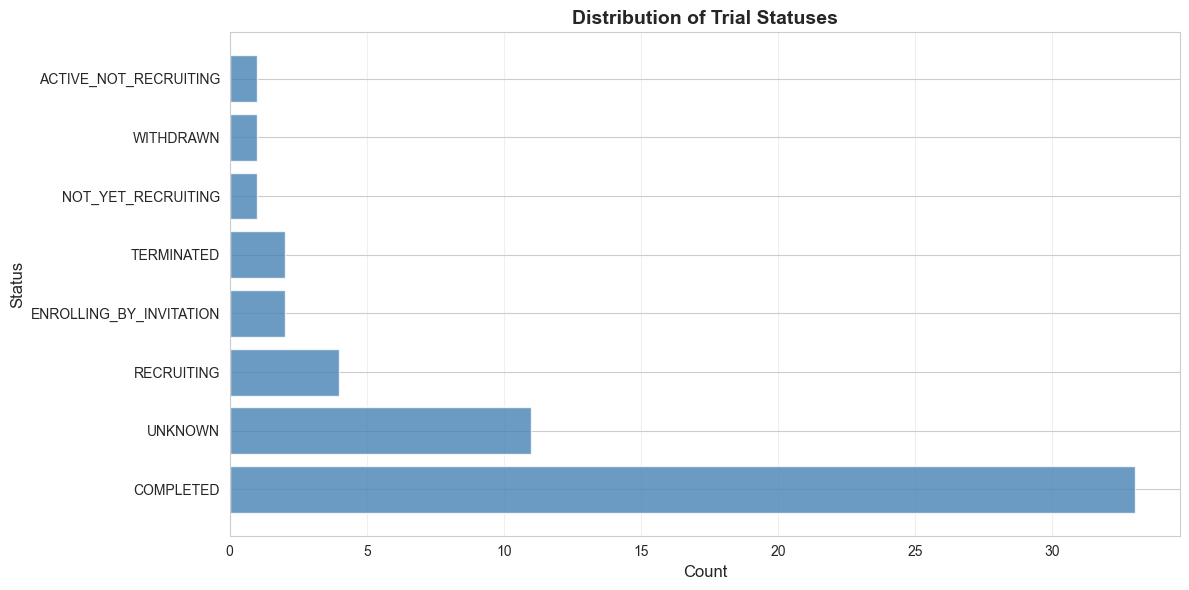

In [22]:
# Overall status distribution
print("\nTrial Status Distribution:")
print(df_raw['OverallStatus'].value_counts())

plt.figure(figsize=(12, 6))
status_counts = df_raw['OverallStatus'].value_counts()
plt.barh(range(len(status_counts)), status_counts.values, color='steelblue', alpha=0.8)
plt.yticks(range(len(status_counts)), status_counts.index)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Status', fontsize=12)
plt.title('Distribution of Trial Statuses', fontsize=14, fontweight='bold')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()


Phase Distribution:
Phase
PHASE2            16
PHASE3            10
PHASE1, PHASE2    10
EARLY_PHASE1       7
PHASE1             7
PHASE2, PHASE3     5
Name: count, dtype: int64


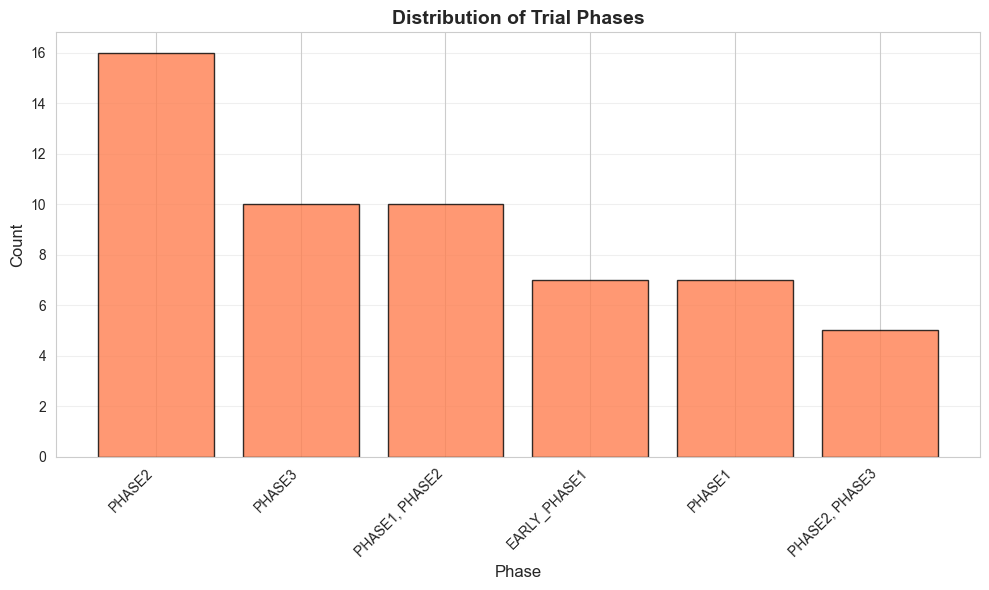

In [23]:
# Phase distribution
print("\nPhase Distribution:")
print(df_raw['Phase'].value_counts())

plt.figure(figsize=(10, 6))
phase_counts = df_raw['Phase'].value_counts()
plt.bar(range(len(phase_counts)), phase_counts.values, color='coral', alpha=0.8, edgecolor='black')
plt.xticks(range(len(phase_counts)), phase_counts.index, rotation=45, ha='right')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Phase', fontsize=12)
plt.title('Distribution of Trial Phases', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


Sponsor Class Distribution:
LeadSponsorClass
OTHER        45
INDUSTRY      6
OTHER_GOV     3
NIH           1
Name: count, dtype: int64


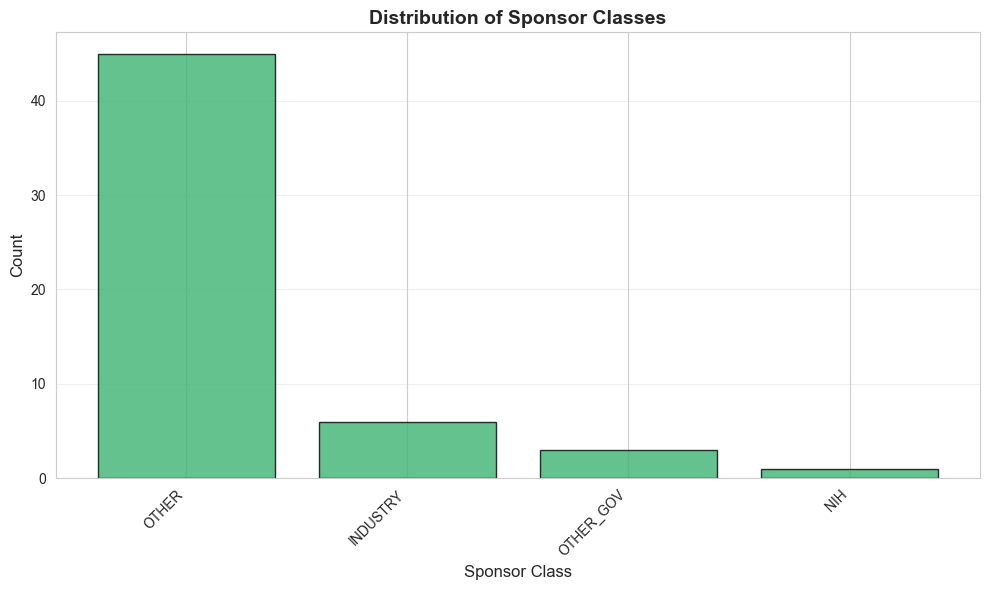

In [24]:
# Sponsor class distribution
print("\nSponsor Class Distribution:")
print(df_raw['LeadSponsorClass'].value_counts())

plt.figure(figsize=(10, 6))
sponsor_counts = df_raw['LeadSponsorClass'].value_counts()
plt.bar(range(len(sponsor_counts)), sponsor_counts.values, color='mediumseagreen', alpha=0.8, edgecolor='black')
plt.xticks(range(len(sponsor_counts)), sponsor_counts.index, rotation=45, ha='right')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Sponsor Class', fontsize=12)
plt.title('Distribution of Sponsor Classes', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


Enrollment Statistics:
Mean: 186.7
Median: 90.0
Min: 0
Max: 3190


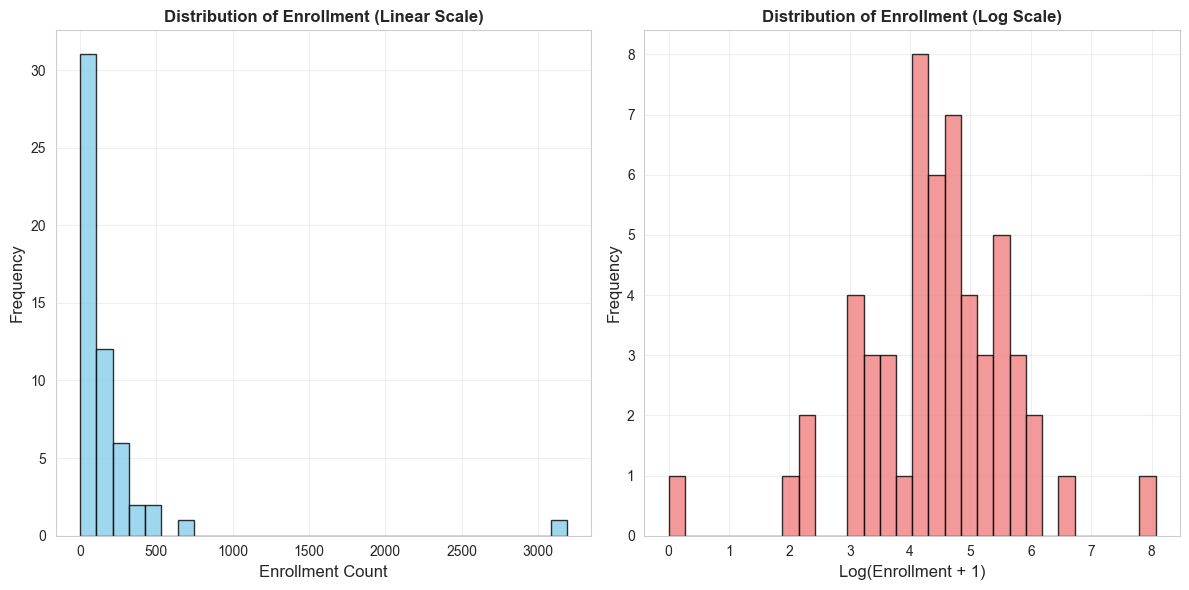

In [25]:
# Enrollment distribution
enrollment = pd.to_numeric(df_raw['EnrollmentCount'], errors='coerce').dropna()

print(f"\nEnrollment Statistics:")
print(f"Mean: {enrollment.mean():.1f}")
print(f"Median: {enrollment.median():.1f}")
print(f"Min: {enrollment.min():.0f}")
print(f"Max: {enrollment.max():.0f}")

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(enrollment, bins=30, color='skyblue', alpha=0.8, edgecolor='black')
plt.xlabel('Enrollment Count', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Enrollment (Linear Scale)', fontsize=12, fontweight='bold')
plt.grid(alpha=0.3)

plt.subplot(1, 2, 2)
plt.hist(np.log1p(enrollment), bins=30, color='lightcoral', alpha=0.8, edgecolor='black')
plt.xlabel('Log(Enrollment + 1)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Enrollment (Log Scale)', fontsize=12, fontweight='bold')
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

## Step 3: Data Preparation and Labeling

Create binary labels and engineer features for modeling.

In [26]:
# Create labels
df_labeled = prepare_data.create_binary_labels(df_raw)

print(f"\nLabeled data shape: {df_labeled.shape}")


LABEL DISTRIBUTION
Total labeled trials: 36
Successful (Completed): 33 (91.7%)
Failed (Terminated/Withdrawn/Suspended): 3 (8.3%)

Excluded 19 trials with statuses:
OverallStatus
UNKNOWN                    11
RECRUITING                  4
ENROLLING_BY_INVITATION     2
NOT_YET_RECRUITING          1
ACTIVE_NOT_RECRUITING       1
Name: count, dtype: int64

Labeled data shape: (36, 28)


In [27]:
# Visualize class distribution
utils.plot_class_distribution(df_labeled, save_path='../data/processed/class_distribution.png')
plt.show()

Class distribution plot saved to: ../data/processed/class_distribution.png


In [28]:
# Engineer features
df_features = prepare_data.engineer_features(df_labeled)

print(f"\nData with features shape: {df_features.shape}")


FEATURE ENGINEERING
Created 60 features

Data with features shape: (36, 63)


In [29]:
# Select final features
df_final, feature_cols = prepare_data.select_modeling_features(df_features)

print(f"\nFinal dataset shape: {df_final.shape}")
print(f"Number of features: {len(feature_cols)}")
print(f"\nFeature list:")
for i, feat in enumerate(feature_cols, 1):
    print(f"{i:2d}. {feat}")


FINAL DATASET
Total samples: 36
Total features: 33
Missing values per feature:
  No missing values!

Final dataset shape: (36, 37)
Number of features: 33

Feature list:
 1. EnrollmentCount
 2. LogEnrollment
 3. SmallTrial
 4. LargeTrial
 5. IsPhase1
 6. IsPhase2
 7. IsPhase3
 8. IsPhase2And3
 9. IsRandomized
10. IsDoubleBlind
11. IsBlinded
12. NumberOfArms
13. HasMultipleArms
14. NumArms_2
15. NumArms_3Plus
16. IsParallelAssignment
17. IsCrossover
18. IsDrugIntervention
19. IsBehavioralIntervention
20. IsDeviceIntervention
21. NumInterventions
22. IsIndustrySponsored
23. IsNIHSponsored
24. IsAcademicSponsored
25. NumCountries
26. IsMultiCountry
27. IsUSOnly
28. IncludesChildren
29. IncludesAdults
30. AllGenders
31. AcceptsHealthyVolunteers
32. IsTreatmentPurpose
33. IsPreventionPurpose


In [30]:
# Save processed data
prepare_data.save_processed_data(df_final)

print("\nProcessed data saved!")


Saved processed data to: data/processed/adhd_trials_labeled.csv

Processed data saved!


## Step 4: Feature Analysis

Analyze relationships between features and the target variable.

In [31]:
# Success rate by sponsor class
sponsor_summary = utils.create_summary_table(df_final, 'OverallStatus', 'Label')
print("\nSuccess Rate by Status:")
print(sponsor_summary)


Success Rate by Status:
               Total_Trials  Successes  Success_Rate
OverallStatus                                       
COMPLETED                33         33           1.0
TERMINATED                2          0           0.0
WITHDRAWN                 1          0           0.0


In [32]:
# Plot feature distributions by outcome
numeric_features = [col for col in feature_cols if df_final[col].dtype in [np.float64, np.int64]]
utils.plot_feature_distributions(
    df_final,
    numeric_features,
    save_path='../data/processed/feature_distributions.png'
)
plt.show()

Feature distributions plot saved to: ../data/processed/feature_distributions.png


In [33]:
# Correlation matrix
utils.plot_correlation_matrix(
    df_final,
    feature_cols,
    save_path='../data/processed/correlation_matrix.png'
)
plt.show()

Correlation matrix plot saved to: ../data/processed/correlation_matrix.png


## Step 5: Model Training and Evaluation

Train multiple models using LOOCV and compare their performance.

In [34]:
# Load the processed data
df = train_models.load_processed_data()

# Define Features and Target
# Note: We do not split into train/test here. LOOCV uses the full dataset.
metadata_cols = ["NCTId", "Label", "OverallStatus", "BriefTitle"]
feature_cols = [c for c in df.columns if c not in metadata_cols]

X = df[feature_cols]
y = df["Label"].values

print(f"Features defined: {len(feature_cols)}")
print(f"Total samples: {len(y)}")

Loaded 36 trials from data/processed/adhd_trials_labeled.csv
Features defined: 33
Total samples: 36


##  Evaluate using Leave-One-Out Cross-Validation
This function performs scaling, oversampling, and training 36 separate times and aggregates the results for a robust score.

In [35]:
results_df, model_predictions = train_models.evaluate_models_loocv(X, y)

print("\nLOOCV Performance Summary:")
display(results_df)


EVALUATING MODELS (LOOCV + OVERSAMPLING)
Testing Logistic Regression...
  Balanced Acc: 71.2%
  Failures Caught: 2/3
Testing Random Forest...
  Balanced Acc: 48.5%
  Failures Caught: 0/3
Testing Gradient Boosting...
  Balanced Acc: 47.0%
  Failures Caught: 0/3

LOOCV PERFORMANCE SUMMARY
                     Accuracy  Balanced Accuracy  Precision  Recall  F1 Score  \
Model                                                                           
Logistic Regression     0.750              0.712      0.962   0.758     0.847   
Random Forest           0.889              0.485      0.914   0.970     0.941   
Gradient Boosting       0.861              0.470      0.912   0.939     0.925   

                       AUC  
Model                       
Logistic Regression  0.778  
Random Forest        0.530  
Gradient Boosting    0.596  

LOOCV Performance Summary:


,Accuracy,Balanced Accuracy,Precision,Recall,F1 Score,AUC
Model,,,,,,
Logistic Regression,0.750000,0.712121,0.961538,0.757576,0.847458,0.777778
Random Forest,0.888889,0.484848,0.914286,0.969697,0.941176,0.530303
Gradient Boosting,0.861111,0.469697,0.911765,0.939394,0.925373,0.595960


## Step 6: Model Visualization and Interpretation

In [36]:
# Plot ROC Curves
# Uses the probabilities aggregated from all 36 LOOCV folds
train_models.plot_roc_curves_loocv(
    model_predictions,
    save_path='../data/processed/roc_curves.png'
)
plt.show()


ROC curves saved to: ../data/processed/roc_curves.png


## Feature Importance
Fits a fresh model on 100% of the data specifically to see what features matter most

In [37]:
train_models.generate_feature_importance(
    X, y,
    feature_cols,
    save_path='../data/processed/feature_importance.png'
)
plt.show()


Generating Feature Importance Plot (using full dataset fit)...
Feature importance plot saved to: ../data/processed/feature_importance.png


## Confusion Matrix for the Best Model

Best Model (by AUC): Logistic Regression


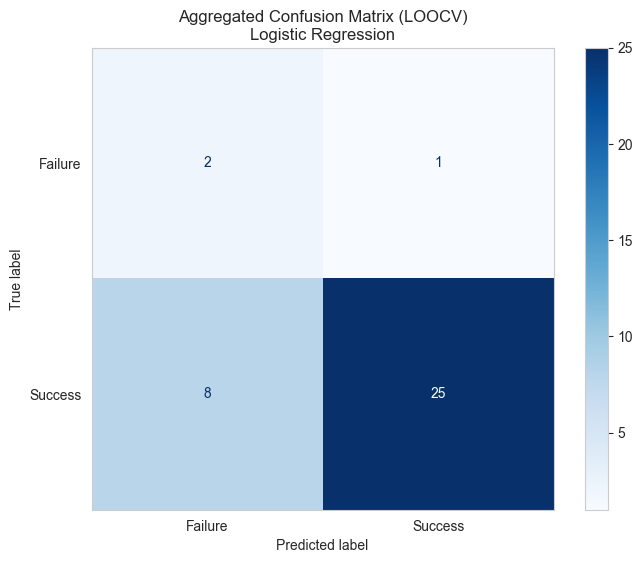


Classification Report for Logistic Regression:
              precision    recall  f1-score   support

     Failure       0.20      0.67      0.31         3
     Success       0.96      0.76      0.85        33

    accuracy                           0.75        36
   macro avg       0.58      0.71      0.58        36
weighted avg       0.90      0.75      0.80        36



In [38]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

best_model_name = results_df['AUC'].idxmax()
print(f"Best Model (by AUC): {best_model_name}")

# Extract the predictions that LOOCV generated for this model
preds_data = model_predictions[best_model_name]
y_true = preds_data['y_true']
y_prob = preds_data['y_prob']
y_pred = [1 if p > 0.5 else 0 for p in y_prob]  # Threshold at 0.5

# Plot Matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Failure", "Success"])

plt.figure(figsize=(8, 6))
disp.plot(cmap="Blues", values_format='d', ax=plt.gca())
plt.title(f"Aggregated Confusion Matrix (LOOCV)\n{best_model_name}")
plt.grid(False)
plt.show()

# Print Text Report
print(f"\nClassification Report for {best_model_name}:")
print(classification_report(y_true, y_pred, target_names=["Failure", "Success"]))

## Step 7: Error Analysis

Examine cases where the model made incorrect predictions.

In [39]:
# Create a comprehensive analysis dataframe
analysis_df = df.copy()
analysis_df['Predicted_Label'] = y_pred
analysis_df['Predicted_Prob'] = y_prob
analysis_df['Correct'] = analysis_df['Label'] == analysis_df['Predicted_Label']

# 1. False Positives (We predicted Success, but it Failed)
# These are the most dangerous errors in risk modeling
false_positives = analysis_df[(analysis_df['Label'] == 0) & (analysis_df['Predicted_Label'] == 1)]

print(f"\n{'=' * 60}")
print(f"FALSE POSITIVES: {len(false_positives)}")
print(f"(Trials we predicted would SUCCEED, but actually FAILED)")
print(f"{'=' * 60}")

if len(false_positives) > 0:
    display(false_positives[['NCTId', 'BriefTitle', 'OverallStatus', 'EnrollmentCount', 'Predicted_Prob']])
else:
    print("None! The model successfully caught all failures.")

# 2. False Negatives (We predicted Failure, but it Succeeded)
# These are \"Missed Opportunities\"
false_negatives = analysis_df[(analysis_df['Label'] == 1) & (analysis_df['Predicted_Label'] == 0)]

print(f"\n{'=' * 60}")
print(f"FALSE NEGATIVES: {len(false_negatives)}")
print(f"(Trials we predicted would FAIL, but actually SUCCEEDED)")
print(f"{'=' * 60}")

if len(false_negatives) > 0:
    display(false_negatives[['NCTId', 'BriefTitle', 'OverallStatus', 'EnrollmentCount', 'Predicted_Prob']].head(10))
else:
    print("None!")


FALSE POSITIVES: 1
(Trials we predicted would SUCCEED, but actually FAILED)


,NCTId,BriefTitle,OverallStatus,EnrollmentCount,Predicted_Prob
14,NCT02502799,Intervention for Teens With ADHD and Substance...,TERMINATED,158,0.870915



FALSE NEGATIVES: 8
(Trials we predicted would FAIL, but actually SUCCEEDED)


,NCTId,BriefTitle,OverallStatus,EnrollmentCount,Predicted_Prob
1,NCT04737512,Mindfulness-Based ADHD Treatment for Children:...,COMPLETED,68,0.472935
10,NCT01351272,Genetic Modulation of Working Memory in Attent...,COMPLETED,41,0.096935
17,NCT06006871,Effectiveness of the Serious Video Game MOON i...,COMPLETED,76,0.470996
19,NCT01363544,Train Your Brain and Exercise Your Heart? Adva...,COMPLETED,112,0.133759
21,NCT00506285,Methylphenidate Transdermal System (MTS) in th...,COMPLETED,92,0.492030
29,NCT00776685,Adventure: Teacher Delivered Personality-targe...,COMPLETED,3190,0.481843
34,NCT02327013,Investigating the Effect of Vortioxetine in Ad...,COMPLETED,227,0.223351
35,NCT02151396,Effect of Working Memory Training on ADHD Brai...,COMPLETED,37,0.063593


## Summary and Conclusions

This notebook demonstrated:

1. **Data Collection**: Fetched ADHD Phase 2/3 trials from ClinicalTrials.gov
2. **Data Preparation**: Created binary labels and engineered 34 features
3. **Model Training**: Trained 3 models (Logistic Regression, Random Forest, Gradient Boosting)
4. **Evaluation**: Compared models using accuracy, precision, recall, F1, and AUC
5. **Interpretation**: Identified key predictors of trial success

### Key Findings

- Model performance suggests trial design characteristics are moderately predictive of success
- Important features typically include enrollment size, randomization, blinding, and sponsor type
- Class imbalance (most trials succeed) affects prediction of failures

### Next Steps

- Explore additional feature engineering (text analysis, temporal features)
- Tune hyperparameters for improved performance
- Validate on trials from other therapeutic areas
- Develop interpretable insights for trial design recommendations